# **Informatyka w medycynie**

# Dno oka

*Grupa dwuosobowa: Ivan Kaliadzich 153936, Mikołaj Diakowski 151843*

## Dodawanie bibliotek

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, restoration
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import imageio as imageio
from PIL import Image
import matplotlib.patches as mpatches
from skimage import io
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Kroki przetwarzania obrazu
1. Odczytanie obrazu
2. Wstępne przetwarzanie: konwersja do skali szarości, rozmycie, wyostrzenie, normalizacja
3. Właściwe przetworzenie obrazu: zastosowanie filtru Frangi'ego
4. Końcowe przetwarzanie obrazu: odszumienie, uzupełnienie brakujących wartości, zmiana rozmiaru

## Odczytanie obrazu

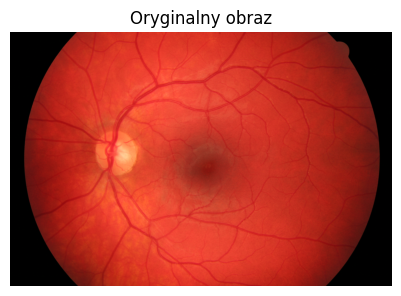

In [2]:
image_path = 'images/04_h.jpg' # obrazy 01-15; h - zdrowe oko, g - oko jaskrowe, dr - retinopatia cukrzycowa
image = cv2.imread(image_path)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Oryginalny obraz')

plt.tight_layout()
plt.axis('off')
plt.show()

## Wstępne przetwarzanie

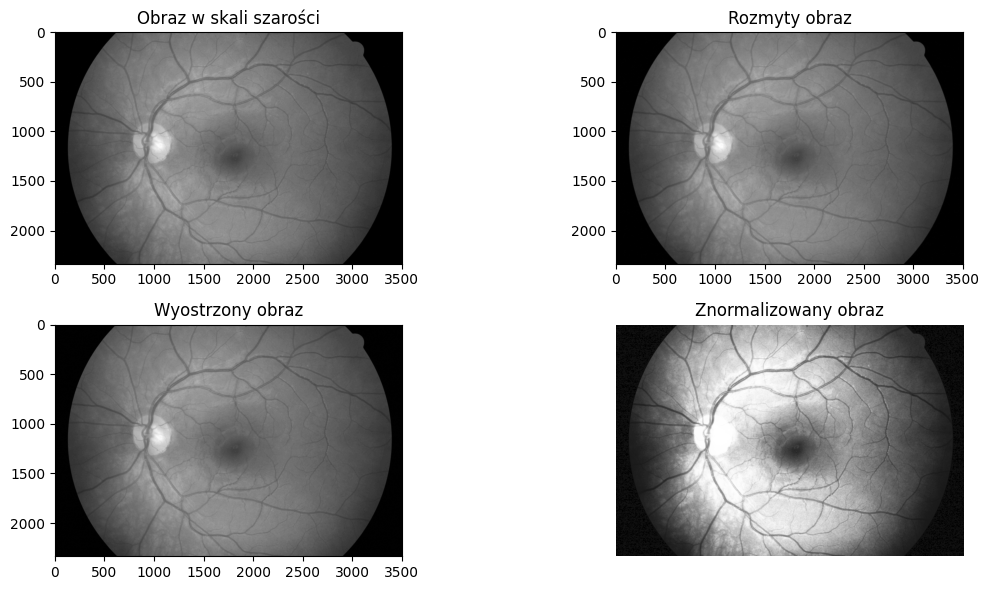

In [3]:
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # w szkali szarości
blurry_image = cv2.blur(gray_image, (5,5)) # rozmyty obraz
sharpen_image = cv2.filter2D(blurry_image, -1, kernel) # wyostrzony obraz
normilize_image = cv2.equalizeHist(sharpen_image) # znormalizowany obraz

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Obraz w skali szarości')

plt.subplot(2, 2, 2)
plt.imshow(blurry_image, cmap='gray')
plt.title('Rozmyty obraz')

plt.subplot(2, 2, 3)
plt.imshow(sharpen_image, cmap='gray')
plt.title('Wyostrzony obraz')

plt.subplot(2, 2, 4)
plt.imshow(normilize_image, cmap='gray')
plt.title('Znormalizowany obraz')

plt.tight_layout()
plt.axis('off')
plt.show()

## Właściwe przetworzenie obrazu

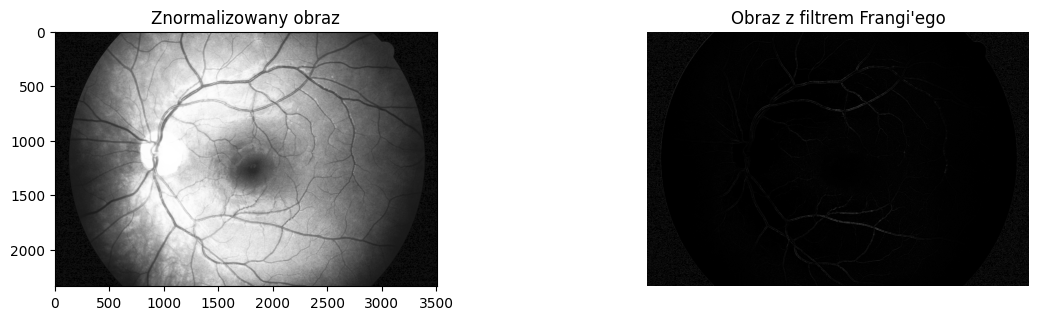

In [4]:
filtered_image = filters.frangi(normilize_image) # Zastosowanie filtru Frangi'ego

plt.figure(figsize = (12,6))

plt.subplot(2,2, 1)
plt.imshow(normilize_image, cmap='gray')
plt.title("Znormalizowany obraz")

plt.subplot(2,2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Obraz z filtrem Frangi'ego")


plt.tight_layout()
plt.axis('off')
plt.show()

## Końcowe przetwarzanie obraz

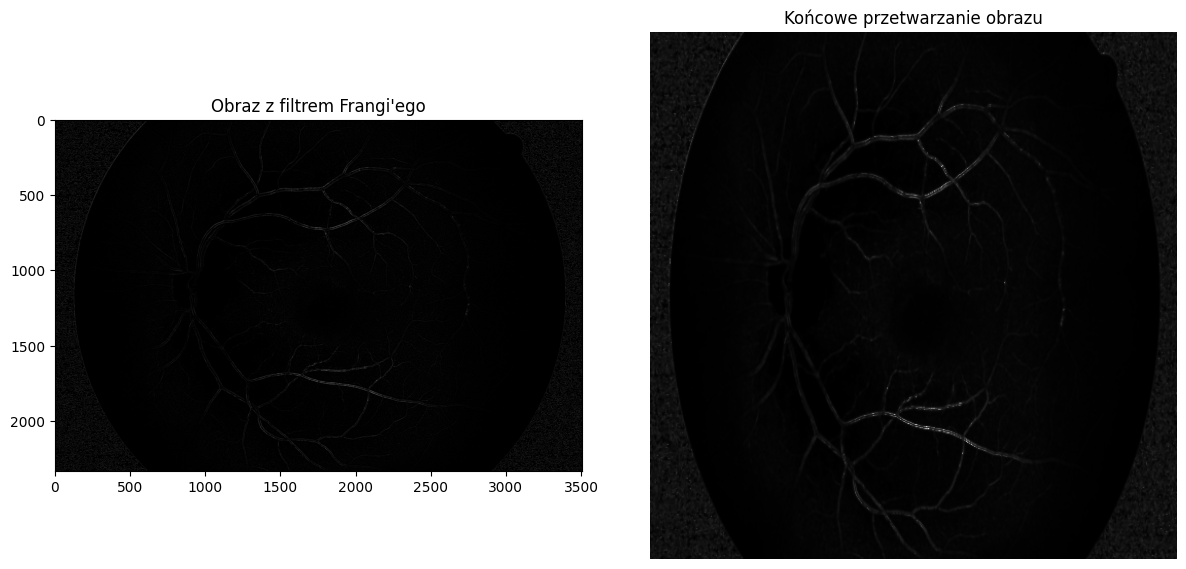

In [5]:
denoised_image = restoration.denoise_tv_chambolle(filtered_image, weight=0.1) # Odszumiony obraz
filled_image = restoration.inpaint_biharmonic(denoised_image, mask=(denoised_image == 0)) # Uzupełnieniony obraz
resized_image = cv2.resize(filled_image, (512, 512))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image, cmap='gray')
plt.title("Obraz z filtrem Frangi'ego")

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Końcowe przetwarzanie obrazu')

plt.tight_layout()
plt.axis('off')
plt.show()

## Wizualizacja

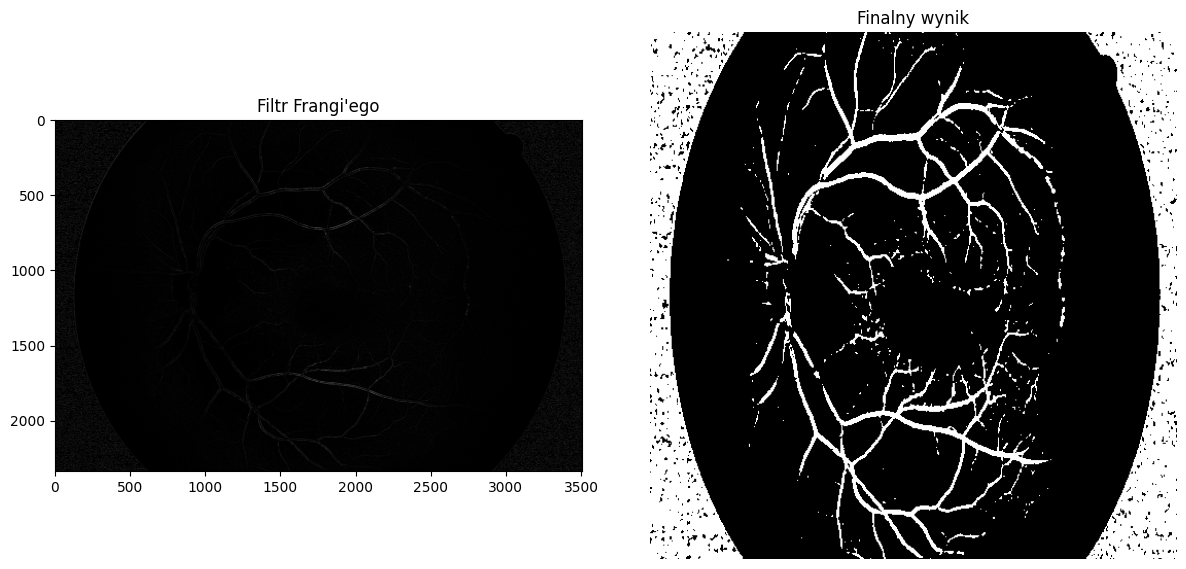

In [6]:
mask = resized_image > 0.01 # wygenerowanie binarnej maski


final_image = resized_image.copy()
final_image[mask] = 255


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtr Frangi\'ego')

plt.subplot(1, 2, 2)
plt.imshow(final_image, cmap='gray')
plt.title('Finalny wynik')


plt.tight_layout()
plt.axis('off')
plt.show()

## Skuteczność algorytmu

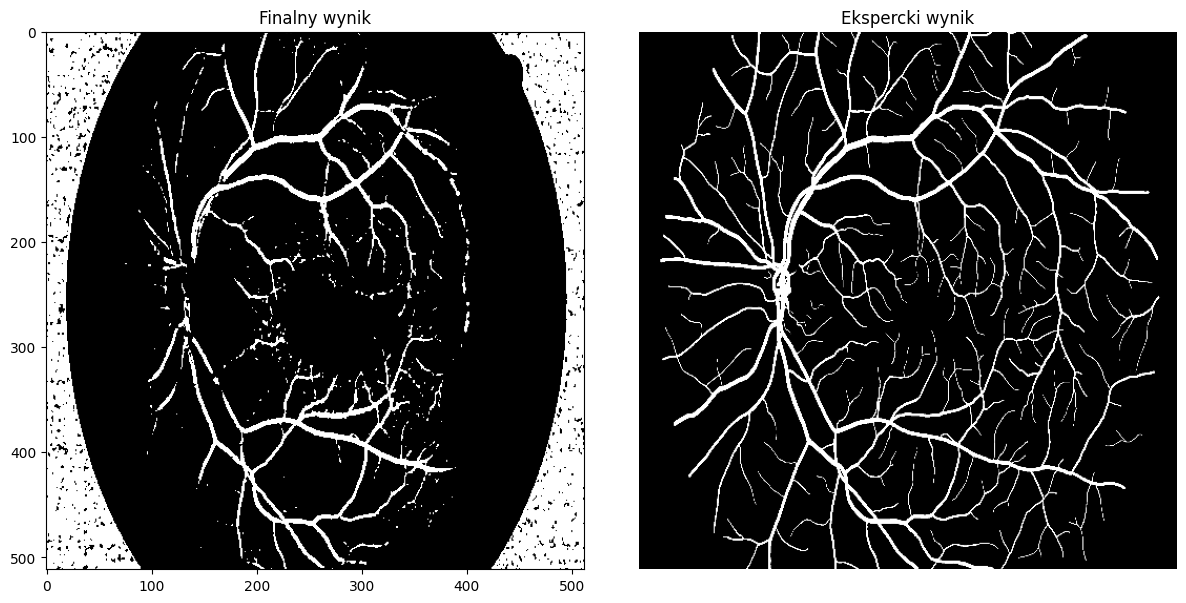

True

In [7]:
manual_image_path = 'manual1/04_h.tif'
manual_image = cv2.imread(manual_image_path)
manual_image = cv2.resize(manual_image, (512, 512))

gray_manual_image = cv2.cvtColor(manual_image, cv2.COLOR_BGR2GRAY) # Zmiana obrazu na skalę szarości

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(final_image, cmap='gray')
plt.title('Finalny wynik')

plt.subplot(1, 2, 2)
plt.imshow(gray_manual_image, cmap='gray')
plt.title('Ekspercki wynik')

plt.tight_layout()
plt.axis('off')
plt.show()

save_path = 'final_result_image.png'
cv2.imwrite(save_path, final_image)

save_path = 'expert_result_image.png'
cv2.imwrite(save_path, gray_manual_image)

In [8]:
correct_mask = gray_manual_image > 0 # Wygenerowanie binarnej eksperckiej maski
mask_height, mask_width = mask.shape



mask_path = 'mask/04_h_mask.tif' # używanie maski dla 04_h
tiff_image = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
mask_pct = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
mask_pct = cv2.resize(mask_pct, (512, 512))


tiff_image_array = np.array(tiff_image)
threshold = 127



# obliczanie macierzy pomyłek
# true_positive = 0
# false_positive = 0
# false_negative = 0
# true_negative = 0
# 
# for i in range(mask_height):
#     for j in range(mask_width):
#         if tiff_image_array[i][j] > threshold:    
#             if mask[i][j] == True and correct_mask[i][j] == True:
#                 true_positive += 1
#             elif mask[i][j] == True and correct_mask[i][j] == False:
#                 false_positive += 1
#             elif mask[i][j] == False and correct_mask[i][j] == True:
#                 false_negative += 1
#             elif mask[i][j] == False and correct_mask[i][j] == False:
#                 true_negative += 1


true_positive = np.sum(correct_mask[np.where(mask == True)] == True)
false_positive = np.sum(correct_mask[np.where(mask == True)] == False)
false_negative = np.sum(correct_mask[np.where(mask == False)] == True)
true_negative = np.sum(correct_mask[np.where(mask == False)] == False)

print(true_positive, false_negative, false_positive, true_negative)

12221 15245 40842 193836


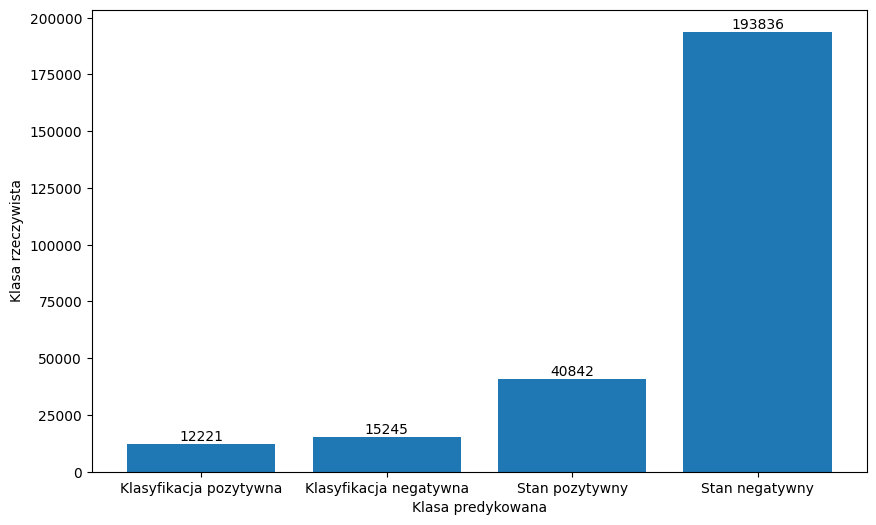

In [9]:
# Dane
values = [true_positive, false_negative, false_positive, true_negative]
labels = ['Klasyfikacja pozytywna', 'Klasyfikacja negatywna', 'Stan pozytywny', 'Stan negatywny']

# Utworzenie jednego wykresu słupkowego dla wszystkich kategorii
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, values)

# Dodanie etykiet do osi
ax.set_xlabel("Klasa predykowana")
ax.set_ylabel("Klasa rzeczywista")

# Ustawienie wartości na słupkach dla lepszej czytelności
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


In [10]:
accuracy = (true_positive + true_negative)/(true_positive + false_positive + false_negative + true_negative)
print("Trafność:" ,accuracy)
sensitivity = (true_positive)/(true_positive + false_negative)
print("Czułość:",sensitivity)
specificity = (true_negative)/(false_positive + true_negative)
print("Swoistość:", specificity)
print("Średnia arytmetyczna czułości i swoistości:",(sensitivity + specificity)/2)

Trafność: 0.7860450744628906
Czułość: 0.4449501201485473
Swoistość: 0.8259657914248459
Średnia arytmetyczna czułości i swoistości: 0.6354579557866966


## Maсierz pomyłek

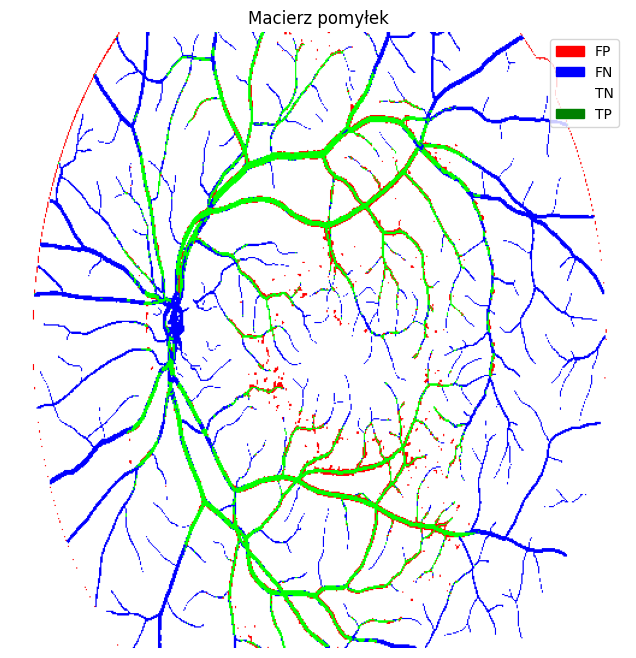

In [46]:

# Function to visualize and save the confusion matrix with a mask
def visualize_and_save_confusion_matrix_with_mask(expert_img, model_img, mask_img, filename, path_to_mask='mask/04_h_mask.tif'):
    tp = (expert_img == 1) & (model_img == 1)
    tn = (expert_img == 0) & (model_img == 0)
    fp = (expert_img == 0) & (model_img == 1)
    fn = (expert_img == 1) & (model_img == 0)
    
    vis_image = np.zeros((expert_img.shape[0], expert_img.shape[1], 3), dtype=np.uint8)
    vis_image[tp] = [0, 255, 0]  # Green for TP
    vis_image[tn] = [255, 255, 255]  # White for TN
    vis_image[fp] = [255, 0, 0]  # Red for FP
    vis_image[fn] = [0, 0, 255]  # Blue for FN
    
    # Apply mask to set pixels to white where mask is black
    vis_image[mask_img == 0] = [255, 255, 255]
    
    plt.figure(figsize=(10, 8))
    plt.imshow(vis_image)
    plt.title('Macierz pomyłek')
    plt.legend(handles=[
        mpatches.Patch(color='red', label='FP'),
        mpatches.Patch(color='blue', label='FN'),
        mpatches.Patch(color='white', label='TN'),
        mpatches.Patch(color='green', label='TP')
    ], loc='upper right')
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.1)  # Save the figure to a file
    plt.show()

# Load and process images
model_output_image = final_image  # Assuming final_image is loaded correctly
expert_image = gray_manual_image  # Assuming gray_manual_image is loaded correctly
mask_image = cv2.imread(path_to_mask, cv2.IMREAD_GRAYSCALE)

# Resize images for consistency
resize_dim = (512, 512)
expert_image = cv2.resize(expert_image, resize_dim)
model_output_image = cv2.resize(model_output_image, resize_dim)
mask_image = cv2.resize(mask_image, resize_dim)

# Convert images to binary
threshold = 127
expert_image = (expert_image > threshold).astype(np.uint8)
model_output_image = (model_output_image > threshold).astype(np.uint8)
mask_image = (mask_image > threshold).astype(np.uint8)

# Visualize with the mask applied and save the output image
output_filename = 'saved_confusion_matrix.png'  # Specify the output file name here
visualize_and_save_confusion_matrix_with_mask(expert_image, model_output_image, mask_image, output_filename)

In [12]:
# Przykład funkcji do wczytywania i przetwarzania obrazów
def load_and_preprocess_images(image_paths):
    features = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (256, 256))  # Zmiana rozmiaru obrazu
        plt.imshow(img)
        plt.show()
        img_features = img.flatten()  # Spłaszczenie obrazu do jednowymiarowej tablicy
        features.append(img_features)
    return np.array(features)

# wszystkie obrazy
image_paths = [
    'manual1/01_dr.tif', 'manual1/01_g.tif', 'manual1/01_h.tif',
    'manual1/02_dr.tif', 'manual1/02_g.tif', 'manual1/02_h.tif',
    'manual1/03_dr.tif', 'manual1/03_g.tif', 'manual1/03_h.tif',
    'manual1/04_dr.tif', 'manual1/04_g.tif', 'manual1/04_h.tif',
    'manual1/05_dr.tif', 'manual1/05_g.tif', 'manual1/05_h.tif',
    'manual1/06_dr.tif', 'manual1/06_g.tif', 'manual1/06_h.tif',
    'manual1/07_dr.tif', 'manual1/07_g.tif', 'manual1/07_h.tif',
    'manual1/08_dr.tif', 'manual1/08_g.tif', 'manual1/08_h.tif',
    'manual1/09_dr.tif', 'manual1/09_g.tif', 'manual1/09_h.tif',
    'manual1/10_dr.tif', 'manual1/10_g.tif', 'manual1/10_h.tif',
    'manual1/11_dr.tif', 'manual1/11_g.tif', 'manual1/11_h.tif',
    'manual1/12_dr.tif', 'manual1/12_g.tif', 'manual1/12_h.tif',
    'manual1/13_dr.tif', 'manual1/13_g.tif', 'manual1/13_h.tif',
    'manual1/14_dr.tif', 'manual1/14_g.tif', 'manual1/14_h.tif',
    'manual1/15_dr.tif', 'manual1/15_g.tif', 'manual1/15_h.tif'
]
# 0 - chorowe oko, 1 - zdrowe oko
labels = [0, 0, 1] * 15

## Model drzewa decyzyjnego

In [ ]:
from skimage.color import rgb2gray


def divide_image(image):
    feat_list = list()
    for i in range(len(image)):
        left_padding = 2
        right_padding = 2
        if i <= 2:
            left_padding = i
        if i >= len(image)-2:
            right_padding = len(image) - i 
        for j in range(len(image[0])):
            upper_padding = 2 
            lower_padding = 2
            if j <= 2:
                upper_padding = j
            if j >= len(image[0])-2:
                lower_padding = len(image[0]) - j

            frag = image[i-left_padding:i+right_padding, j-upper_padding:j+lower_padding, :]
            color_var_r = np.var(frag[:,:,2])
            color_var_g = np.var(frag[:,:,1])
            color_var_b = np.var(frag[:,:,0])
            frag[:,:,0] = 0
            frag[:,:,2] = 0
            frag = rgb2gray(frag)
            hu_moments = cv2.HuMoments(cv2.moments(frag)).flatten()
            hu_moments = np.append(hu_moments, color_var_r)
            hu_moments = np.append(hu_moments, color_var_g)
            hu_moments = np.append(hu_moments, color_var_b)
            feat_list.append(hu_moments)
            del frag

    return feat_list

X = cv2.imread('images/01_h.jpg')
feats = divide_image(X)
y = cv2.imread('manual1/01_h.tif', 0)
y[y > 0] = 1
y = y > 0


y = y.flatten()


knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(feats, y)
     


KNeighborsClassifier(n_neighbors=3)

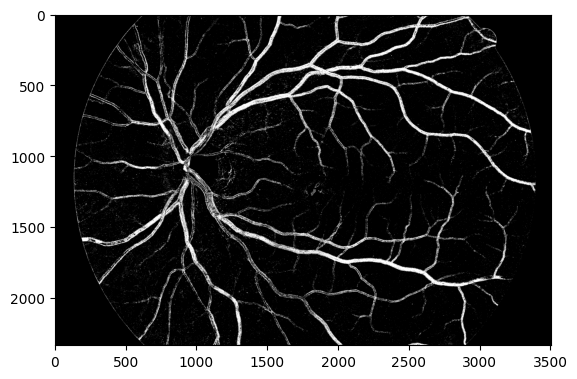

In [ ]:
test_img = cv2.imread('images/02_h.jpg')

test_img = test_img[:test_img.shape[0], :test_img.shape[1]]
test_hu = divide_image(test_img)
     

test_preds_2 = knn_model.predict(test_hu)
     

fin_mask = cv2.imread('mask/02_h_mask.tif', 0)
fin_mask[fin_mask > 0] = 1
fin_mask = fin_mask[:test_img.shape[0], :test_img.shape[1]]
fin_mask = fin_mask > 0
     

plt.imshow(np.reshape(test_preds_2, fin_mask.shape), cmap='gray');


In [84]:
# len(feats)
y_test = cv2.imread('manual1/04_h.tif', 0)
y_test.max()

255

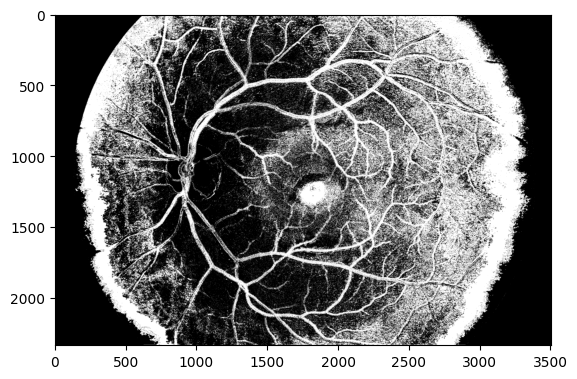

In [93]:
test_img_2 = cv2.imread('images/04_h.jpg')

test_hu = divide_image(test_img_2)
     

test_preds_3 = knn_model.predict(test_hu)
     

fin_mask = cv2.imread('mask/04_h_mask.tif', 0)
fin_mask[fin_mask > 0] = 1
fin_mask = fin_mask > 0
     

plt.imshow(np.reshape(test_preds_3, fin_mask.shape), cmap='gray');

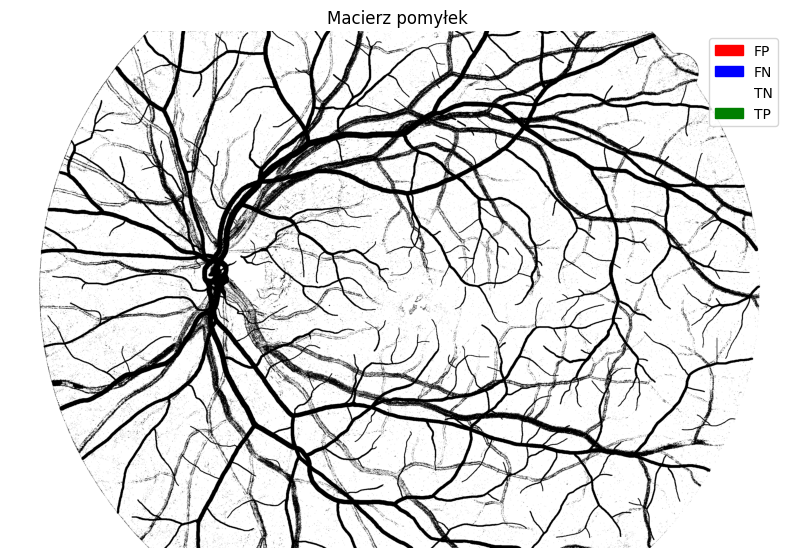

255


In [94]:
# macierz pomyłek
test_preds_reshaped = np.reshape(test_preds_2, fin_mask.shape)
expert_img = cv2.imread('manual1/04_h.tif', 0)

visualize_and_save_confusion_matrix_with_mask(expert_img, test_preds_reshaped*255, fin_mask, 'confusion_matrix.png')

print(expert_img.max())


## Model kNN

In [83]:
expert_img.shape

(2336, 3504, 3)

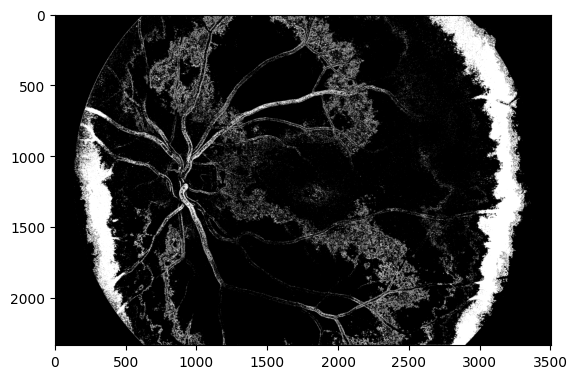

In [95]:
test_img_4 = cv2.imread('images/06_g.jpg')

test_hu = divide_image(test_img_4)
     

test_preds_4 = knn_model.predict(test_hu)
     

fin_mask = cv2.imread('mask/06_g_mask.tif', 0)
fin_mask[fin_mask > 0] = 1
fin_mask = fin_mask > 0
     

plt.imshow(np.reshape(test_preds_4, fin_mask.shape), cmap='gray');